# RFV

**RFV** significa recência, frequência, valor e é utilizado para segmentação de clientes baseado no comportamento de compras dos clientes e agrupa eles em clusters parecidos. Utilizando esse tipo de agrupamento podemos realizar ações de marketing e CRM melhores direcionadas, ajudando assim na personalização do conteúdo e até a retenção de clientes.

Para cada cliente é preciso calcular cada uma das componentes abaixo:

- Recência (R): Quantidade de dias desde a última compra.
- Frequência (F): Quantidade total de compras no período.
- Valor (V): Total de dinheiro gasto nas compras do período.

E é isso que iremos fazer abaixo.



Base de Dados de Compras
   ID_cliente  CodigoCompra  DiaCompra  ValorTotal
0       12747        537215 2020-12-05      358.56
1       12747        538537 2020-12-13      347.71
2       12747        541677 2021-01-20      303.04
3       12747        545321 2021-03-01      310.78
4       12747        551992 2021-05-05      442.96
Tabela RFV
           Recência  Frequência     Valor
ID_cliente                               
12747        2 days          11   4196.01
12748        0 days         178  31533.04
12749        3 days           5   4090.88
12820        3 days           4    942.34
12821      214 days           1     92.72
Classificação de Cliente com Base na Recência
           Recência RecênciaScore
ID_cliente                       
12747        2 days             A
12748        0 days             A
12749        3 days             A
12820        3 days             A
12821      214 days             D
...             ...           ...
18280      277 days             D
18281      1

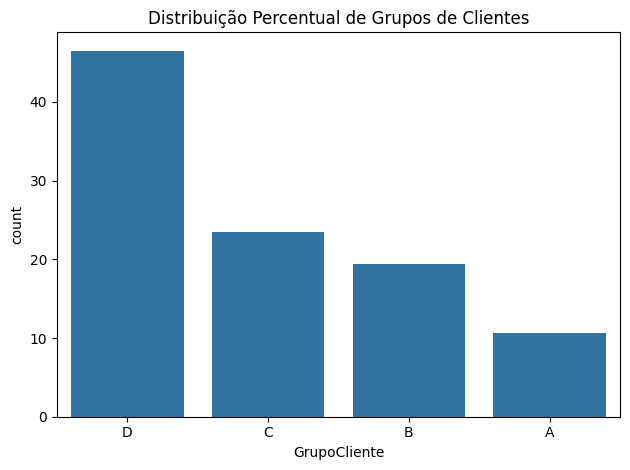

Tabela RFV final
           Recência  Frequência     Valor RecênciaScore FrequênciaScore  \
ID_cliente                                                                
12747        2 days          11   4196.01             A               A   
12748        0 days         178  31533.04             A               A   
12749        3 days           5   4090.88             A               B   
12820        3 days           4    942.34             A               B   
12821      214 days           1     92.72             D               D   

           ValorScore  RFV GrupoCliente  \
ID_cliente                                
12747               A  AAA            A   
12748               A  AAA            A   
12749               A  ABA            B   
12820               B  ABB            B   
12821               D  DDD            D   

                                            Ação de Marketing  
ID_cliente                                                     
12747       Enviar cupons d

In [115]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importando base de dados
df_compras = pd.read_csv('./input_1.csv', parse_dates=['DiaCompra'])
print('Base de Dados de Compras')
print(df_compras.head(5))

# Criando função anônima para extrair recência
rec = lambda rec: df_compras['DiaCompra'].max() - rec.max()

# Criando tabela RFV
df_RFV = (df_compras
          .groupby(by='ID_cliente')
          .agg({'DiaCompra': rec, 'CodigoCompra': 'count','ValorTotal': 'sum'})
          .rename(columns={'DiaCompra': 'Recência', 'CodigoCompra': 'Frequência', 'ValorTotal': 'Valor'}))
print('Tabela RFV')
print(df_RFV.head(5))

# Avaliando clientes
df_RFV['RecênciaScore'] = ''

df_RFV.loc[df_RFV['Recência'] <= df_RFV['Recência'].quantile(.25), 'RecênciaScore'] = 'A'
df_RFV.loc[
    (df_RFV['Recência'] > df_RFV['Recência'].quantile(0.25)) & 
    (df_RFV['Recência'] <= df_RFV['Recência'].quantile(0.50)), 
    'RecênciaScore'
] = 'B'
df_RFV.loc[
    (df_RFV['Recência'] > df_RFV['Recência'].quantile(0.50)) & 
    (df_RFV['Recência'] <= df_RFV['Recência'].quantile(0.75)), 
    'RecênciaScore'
] = 'C'
df_RFV.loc[df_RFV['Recência'] > df_RFV['Recência'].quantile(.75), 'RecênciaScore'] = 'D'

print('Classificação de Cliente com Base na Recência')
print(df_RFV[['Recência', 'RecênciaScore']])

df_RFV['FrequênciaScore'] = ''

df_RFV.loc[df_RFV['Frequência'] <= df_RFV['Frequência'].quantile(.25), 'FrequênciaScore'] = 'D'
df_RFV.loc[
    (df_RFV['Frequência'] > df_RFV['Frequência'].quantile(0.25)) & 
    (df_RFV['Frequência'] <= df_RFV['Frequência'].quantile(0.50)), 
    'FrequênciaScore'
] = 'C'
df_RFV.loc[
    (df_RFV['Frequência'] > df_RFV['Frequência'].quantile(0.50)) & 
    (df_RFV['Frequência'] <= df_RFV['Frequência'].quantile(0.75)), 
    'FrequênciaScore'
] = 'B'
df_RFV.loc[df_RFV['Frequência'] > df_RFV['Frequência'].quantile(.75), 'FrequênciaScore'] = 'A'

print('Classificação de Cliente com Base na Frequência')
print(df_RFV[['Frequência', 'FrequênciaScore']])

df_RFV['ValorScore'] = ''

df_RFV.loc[df_RFV['Valor'] <= df_RFV['Valor'].quantile(.25), 'ValorScore'] = 'D'
df_RFV.loc[
    (df_RFV['Valor'] > df_RFV['Valor'].quantile(0.25)) & 
    (df_RFV['Valor'] <= df_RFV['Valor'].quantile(0.50)), 
    'ValorScore'
] = 'C'
df_RFV.loc[
    (df_RFV['Valor'] > df_RFV['Valor'].quantile(0.50)) & 
    (df_RFV['Valor'] <= df_RFV['Valor'].quantile(0.75)), 
    'ValorScore'
] = 'B'
df_RFV.loc[df_RFV['Valor'] > df_RFV['Valor'].quantile(.75), 'ValorScore'] = 'A'

print('Classificação de Cliente com Base no Valor')
print(df_RFV[['Valor', 'ValorScore']])

df_RFV['RFV'] = df_RFV['RecênciaScore'] + df_RFV['FrequênciaScore'] + df_RFV['ValorScore']
print(df_RFV.head(5))

# Segmentando clientes em grupos
df_RFV['GrupoCliente'] = ''
df_RFV.loc[df_RFV['RFV'].str.contains('A'), 'GrupoCliente'] = 'A'
df_RFV.loc[df_RFV['RFV'].str.contains('B'), 'GrupoCliente'] = 'B'
df_RFV.loc[df_RFV['RFV'].str.contains('C'), 'GrupoCliente'] = 'C'
df_RFV.loc[df_RFV['RFV'].str.contains('D'), 'GrupoCliente'] = 'D'

# Visualizando distribuição percentual dos grupos na base de dados
sns.barplot(((df_RFV['GrupoCliente'].value_counts() / df_RFV.shape[0])*100))
plt.title('Distribuição Percentual de Grupos de Clientes')
plt.tight_layout()
plt.show()

# Mapeando ações de marketing de acordo com o perfil do cliente
dict_acoes = {
    'AAA':
    'Enviar cupons de desconto, Pedir para indicar nosso produto pra algum amigo, Ao lançar um novo produto enviar amostras grátis pra esses.',
    'DDD':
    'Churn! clientes que gastaram bem pouco e fizeram poucas compras, fazer nada',
    'DAA':
    'Churn! clientes que gastaram bastante e fizeram muitas compras, enviar cupons de desconto para tentar recuperar',
    'CAA':
    'Churn! clientes que gastaram bastante e fizeram muitas compras, enviar cupons de desconto para tentar recuperar'
}

df_RFV['Ação de Marketing'] = df_RFV['RFV'].map(dict_acoes)

print('Tabela RFV final')
print(df_RFV.head(5))